In [2]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = os.path.join('.', 'results')

In [3]:
def get_graph_info(files, column_name):
    graph_info = {}
    for file in files:
        df = pd.read_csv(file)
        relative_error = df[column_name].mean()

        option = os.path.basename(os.path.dirname(file))

        file_name = os.path.basename(file)
        elitism = float(file_name.split('_')[2][:-4])

        if option not in graph_info:
            graph_info[option] = []
        graph_info[option].append((elitism, relative_error))
        
    return graph_info

def plot_graph(graph_info, y_label):
    m_values = graph_info['M']
    q_values = graph_info['Q']

    for values in [m_values, q_values]:
        values.sort(key=lambda x: x[0])
        
        elitisms = [x[0] for x in values]
        errors = [x[1] for x in values]

        plt.plot(elitisms, errors, label='M' if values == m_values else 'Q')

    plt.xlabel('Mutation Probability')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [4]:
def get_graph_info(files_linear, files_adaptive, column_name, names):
    graph_infos = {}
    
    files_options = [files_linear, files_adaptive]
    names = names

    for i in range(2):
        files = files_options[i]
        name = names[i]

        graph_info = []
        for file in files:

            df = pd.read_csv(file)
            relative_error = df[column_name].mean()

            file_name = os.path.basename(file)
            mutation = float(file_name.split('_')[2][:-4])

            graph_info.append((mutation, relative_error))

        graph_infos[name] = graph_info

    return graph_infos

def plot_graph(graph_info, y_label, names):
    for name in names:
        values = graph_info[name]
        values.sort(key=lambda x: x[0])

        mutations = [x[0] for x in values]
        errors = [x[1] for x in values]

        plt.plot(mutations, errors, label=name)

    plt.xlabel('Mutation Probability')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

{'Fixed': [(0.0, 0.01503675300053425), (0.1, 0.0031719899023158796), (0.2, 0.048101210967689184), (0.3, 0.09058229362180334), (0.4, 0.11120224503662834), (0.5, 0.15975653013393876), (0.6, 0.17177496631817038), (0.7, 0.1932477853652035), (0.8, 0.16520489665959387), (0.9, 0.06458231371560642)], 'Adaptive': [(0.3, 0.0), (0.4, 0.0031719899023158796), (0.5, 0.0), (0.6, 0.0031719899023158796), (0.7, 0.004912138818905849), (0.8, 0.0031719899023158796), (0.9, 0.0031719899023158796)]}


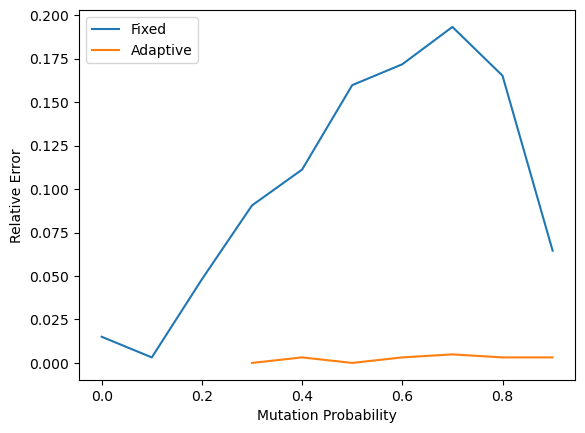

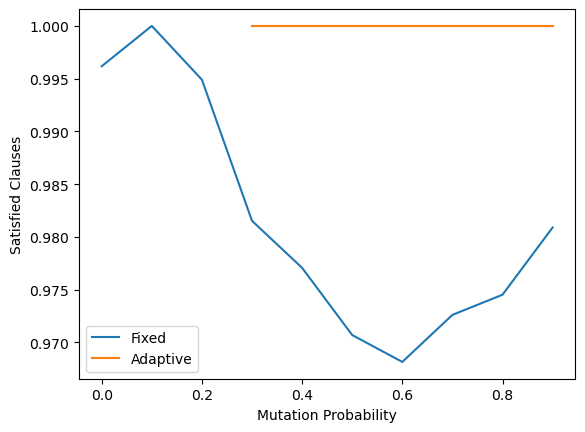

----------------


{'Fixed': [(0.0, 5.818035686738146), (0.1, 6.584442187946635), (0.2, 6.247083780442854), (0.3, 5.767632815812856), (0.4, 5.966680724205521), (0.5, 5.570699875137516), (0.6, 5.832268365860322), (0.7, 5.271080305903601), (0.8, 5.900180491240514), (0.9, 5.510246841644509)], 'Adaptive': [(0.3, 6.327506969472039), (0.4, 6.540212934416319), (0.5, 6.301866081184936), (0.6, 6.4585289329075595), (0.7, 6.170113917351766), (0.8, 6.239736695624574), (0.9, 6.522524141218069)]}


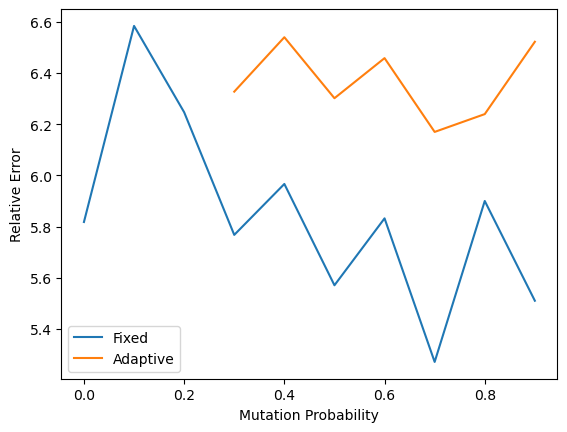

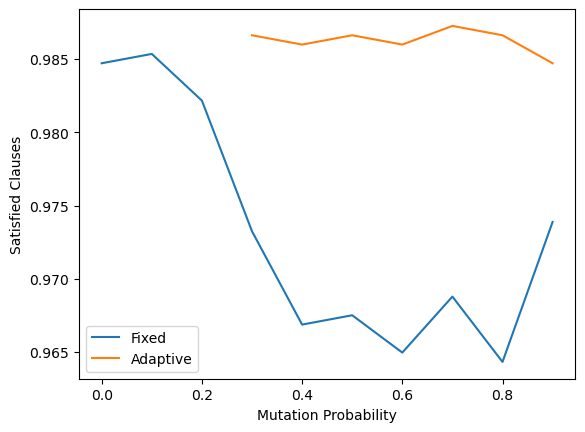

----------------




In [5]:
for option in ['M', 'Q']:
    fixed_csv_files = glob.glob(os.path.join(DATA_DIR, option, 'fixed_mutation_*.csv'))
    adaptive_csv_files = glob.glob(os.path.join(DATA_DIR, option, 'adaptive_mutation_*.csv'))
    names = ['Fixed', 'Adaptive']

    relative_error_graph_info = get_graph_info(fixed_csv_files, adaptive_csv_files, 'relative_error_avg', names)
    satisfied_clauses_graph_info = get_graph_info(fixed_csv_files, adaptive_csv_files, 'satisfied_clauses', names)

    print(relative_error_graph_info)

    plot_graph(relative_error_graph_info, 'Relative Error', names)
    plot_graph(satisfied_clauses_graph_info, 'Satisfied Clauses', names)

    print("----------------\n\n")